In [1]:
import cv2
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt

In [2]:
emotion_dict = {0: "Bravo", 1: "asco", 2: "Miedo", 3: "feliz", 4: "Neutral", 5: "triste", 6: "sorpresa"}

# load json and create model
json_file = open('D:\DATA_analysis\Projects\emodet\Emotion_detection_with_CNN-main\model\emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("D:\DATA_analysis\Projects\emodet\Emotion_detection_with_CNN-main\model\emotion_model.h5")
print("Loaded model from disk")




Loaded model from disk


In [6]:
# start the webcam feed
cap = cv2.VideoCapture(0)

# pass here your video path
# you may download one from here : https://www.pexels.com/video/three-girls-laughing-5273028/
#cap = cv2.VideoCapture(r"D:\DATA_analysis\Projects\emodet\cumple.mp4")

In [7]:
while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.resize(frame, (1280, 720))

    face_detector = cv2.CascadeClassifier('D:\DATA_analysis\Projects\emodet\Emotion_detection_with_CNN-main\haarcascades\haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 29ms/step


KeyboardInterrupt: 

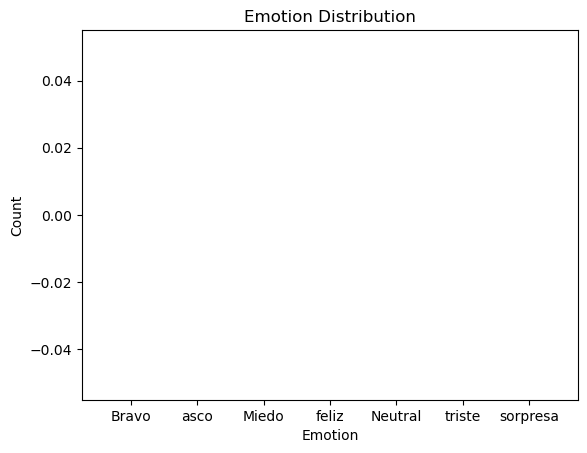

In [4]:
emotion_count = {emotion: 0 for emotion in emotion_dict.values()}

while True:
    # Find haar cascade to draw bounding box around face
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.resize(frame, (1280, 720))
    face_detector = cv2.CascadeClassifier('D:\DATA_analysis\Projects\emodet\Emotion_detection_with_CNN-main\haarcascades\haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        detected_emotion = emotion_dict[maxindex]
        
        # Update emotion count
        emotion_count[detected_emotion] += 1

        cv2.putText(frame, detected_emotion, (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture
cap.release()
cv2.destroyAllWindows()

# Plot the bar chart
emotions = list(emotion_count.keys())
counts = list(emotion_count.values())

plt.bar(emotions, counts, color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink'])
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution')
plt.show()

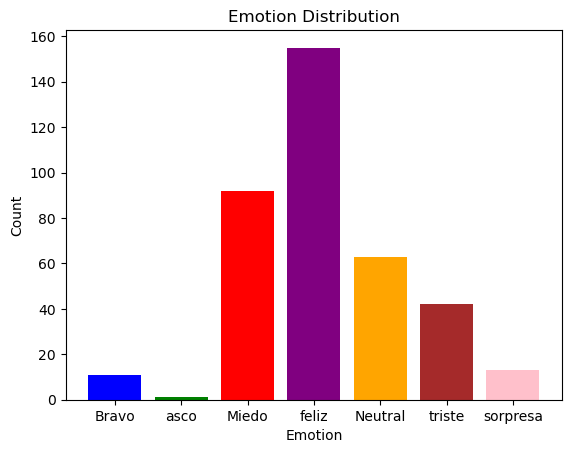

In [15]:
plt.bar(emotions, counts, color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink'])
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution')
plt.show()